<a href="https://colab.research.google.com/github/tranquocdienspkt/Facial-Recognition-AI/blob/main/CNN_face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import  to_categorical
from keras.utils import load_img, img_to_array

import matplotlib.pyplot as plt
from matplotlib.image import imread

from os import listdir

from numpy import asarray
from numpy import save
import numpy as np

folder = '/content/drive/MyDrive/AI_DATA/train/'
photos, labels = list(), list()
for afile in listdir(folder):
  if afile.startswith("C"):
    output = 1.0
  if afile.startswith("D"):
    output = 2.0
  if afile.startswith("H"):
    output = 3.0

  img = load_img(folder + afile, target_size=(200,200))
  photo = img_to_array(img)
  photos.append(photo)
  labels.append(output)

photos = asarray(photos)
labels = asarray(labels)

x_train = photos.reshape(142,200,200,3)
x_train = x_train.astype('float32')/255

y_train = to_categorical(labels,10)

print(x_train.shape)
print(y_train.shape)


(142, 200, 200, 3)
(142, 10)


In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization, LeakyReLU
from keras.optimizers import Adam

model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (200,200,3), padding = 'same'))
model.add(Dropout(0.25))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(64,(3,3), activation='relu', padding= 'same'))
model.add(Dropout(0.25))
model.add(MaxPooling2D((2,2), padding = 'same'))


model.add(Conv2D(128,(3,3), activation='relu', padding = 'same'))
model.add(Dropout(0.25))
model.add(MaxPooling2D((2,2), padding = 'same'))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 dropout (Dropout)           (None, 200, 200, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 dropout_1 (Dropout)         (None, 100, 100, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                    

In [ ]:
from keras.losses import categorical_crossentropy

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs = 20, batch_size = 64)

Epoch 1/20
3/3 [==============================] - 13s 352ms/step - loss: 4.3949 - accuracy: 0.2746
Epoch 2/20
3/3 [==============================] - 0s 110ms/step - loss: 1.4610 - accuracy: 0.6127
Epoch 3/20
3/3 [==============================] - 0s 113ms/step - loss: 0.2768 - accuracy: 0.9577
Epoch 4/20
3/3 [==============================] - 0s 105ms/step - loss: 0.0333 - accuracy: 0.9930
Epoch 5/20
3/3 [==============================] - 0s 102ms/step - loss: 0.0097 - accuracy: 1.0000
Epoch 6/20
3/3 [==============================] - 0s 104ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 7/20
3/3 [==============================] - 0s 101ms/step - loss: 3.1536e-04 - accuracy: 1.0000
Epoch 8/20
3/3 [==============================] - 0s 98ms/step - loss: 7.5107e-04 - accuracy: 1.0000
Epoch 9/20
3/3 [==============================] - 0s 102ms/step - loss: 1.0861e-04 - accuracy: 1.0000
Epoch 10/20
3/3 [==============================] - 0s 98ms/step - loss: 9.3459e-06 - accuracy: 1.0000
Epoc

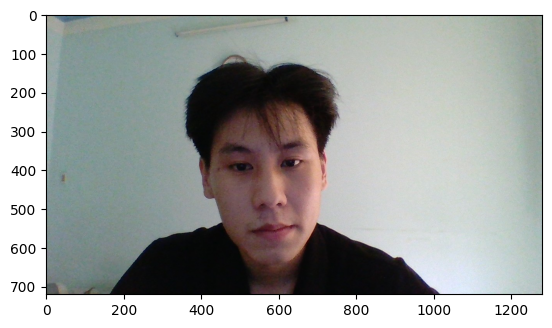

1/1 [==============================] - 0s 33ms/step


array([3])

In [ ]:
img_url = '/content/drive/MyDrive/AI_DATA/test/H (33).jpg'
img = plt.imread(img_url)
plt.imshow(img)
plt.show()

x_test = []

img_test = load_img(img_url, target_size=(200,200))
img_test = img_to_array(img_test)
x_test.append(img_test)

x_test = asarray(x_test)

x_test = x_test.reshape(1,200,200,3)
x_test = x_test.astype('float32')/255

np.argmax(model.predict(x_test), axis = -1)

In [ ]:
model.save('FaceAttendance.h5')